In [1]:
%matplotlib inline
import torch
import torchvision
import gzip
import matplotlib
import torch 
import torch.nn as nn
import torchvision
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device


device(type='cuda', index=0)

## 定义超参数

In [2]:
# num_epochs = 15
num_classes = 10
batch_size = 100
# learning_rate = 0.0005

lr = [0.0005]
num_epochs = [15]
acc = 0

## 读取数据集

In [3]:
train_dataset = torchvision.datasets.MNIST(root='../../data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)
 
test_dataset = torchvision.datasets.MNIST(root='../../data/',
                                          train=False, 
                                          transform=transforms.ToTensor())
 
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)
 
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

## 定义CNN网络

In [4]:
class Net(nn.Module):
    def __init__(self, num_classes=10):
        super(Net, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1,6,kernel_size=5,padding=2),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2,stride=2),
            nn.Conv2d(6,16,kernel_size=5), 
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2,stride=2),
            nn.Flatten()
         )
        self.fc = nn.Sequential(
            nn.Linear(400,120),
            nn.Sigmoid(),
            nn.Linear(120,84),
            nn.Sigmoid(),
            nn.Linear(84,10)
        )
    def forward(self,x):
        out = self.conv(x)
        out = self.fc(out)
        return out


## 开始训练+预测

In [5]:
outter = 0
inner = 0
model = Net(num_classes).to(device)
for l_r in lr: 
    total_step = len(train_loader)
    counter = 1
    l = []
    index = []
    for epochs in num_epochs:
        # model = Net(num_classes).to(device)
        # 定义优化器和loss函数
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=l_r)
        for epoch in range(epochs):
            for i, (images, labels) in enumerate(train_loader):
                images = images.to(device)
                labels = labels.to(device)
                
                outputs = model(images)
                loss = criterion(outputs, labels)
                
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                
                if (i+1) % 200 == 0:
                    print ('Epoch {}/{}, Step {}/{}, Loss: {:.6f}' 
                        .format(epoch+1, epochs, i+1, total_step, loss.item()))
                    l.append(loss.item())
                    index.append(counter)
                    counter += 1
        model.eval() 
        with torch.no_grad():
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = images.to(device)
                labels = labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
 
            print('Accuracy: ' + str(100 * correct / total) + '%')
        acc = 100 * correct / total
        print(acc)
        plt.title("Lr:" + str(l_r) + ' ' + "Epoch:" + str(epochs) + ' acc:' + str(acc) + '% Unit:' + str(counter))
        plt.xlabel('200 steps/Unit')
        plt.ylabel('loss')
        plt.plot(index, l, linewidth=1, color="orange", marker="o",label="Lr:" + str(l_r) + ' ' + "Epoch:" + str(epochs))
        name = "Lr" + str(l_r) + ' ' + "Epoch" + str(epochs) + ".jpg"
        plt.savefig(name)
        plt.clf()
        inner += 1
        counter = 1
        l.clear()
        index.clear()
    counter = 1
    inner=0
    outter += 1
acc

Epoch 1/15, Step 200/600, Loss: 2.297340
Epoch 1/15, Step 400/600, Loss: 1.539344
Epoch 1/15, Step 600/600, Loss: 1.007635
Epoch 2/15, Step 200/600, Loss: 0.599984
Epoch 2/15, Step 400/600, Loss: 0.467955
Epoch 2/15, Step 600/600, Loss: 0.376591
Epoch 3/15, Step 200/600, Loss: 0.413985
Epoch 3/15, Step 400/600, Loss: 0.333720
Epoch 3/15, Step 600/600, Loss: 0.400822
Epoch 4/15, Step 200/600, Loss: 0.340355
Epoch 4/15, Step 400/600, Loss: 0.252661
Epoch 4/15, Step 600/600, Loss: 0.250909
Epoch 5/15, Step 200/600, Loss: 0.150509
Epoch 5/15, Step 400/600, Loss: 0.121516
Epoch 5/15, Step 600/600, Loss: 0.176968
Epoch 6/15, Step 200/600, Loss: 0.167003
Epoch 6/15, Step 400/600, Loss: 0.277418
Epoch 6/15, Step 600/600, Loss: 0.165757
Epoch 7/15, Step 200/600, Loss: 0.124223
Epoch 7/15, Step 400/600, Loss: 0.132113
Epoch 7/15, Step 600/600, Loss: 0.136845
Epoch 8/15, Step 200/600, Loss: 0.230968
Epoch 8/15, Step 400/600, Loss: 0.150584
Epoch 8/15, Step 600/600, Loss: 0.098941
Epoch 9/15, Step

97.83

<Figure size 432x288 with 0 Axes>

[ 7.2253804  -9.852907    0.1318919  -4.524937   -4.214551   -1.3858266
  0.32618657 -5.759858   -0.4751768  -1.0035301 ]
识别结果为:0


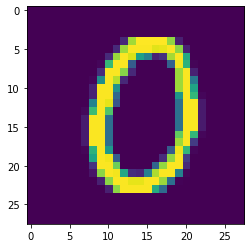

In [52]:
for i, (images, labels) in enumerate(train_loader):
    if i == 1:
        break
    plt.imshow(images[i][0])
    images = images.to(device)
    res = model(images).detach().cpu().numpy()
    idx = res[i]
    print(idx)
    print('识别结果为:' + str(np.where(idx == max(idx))[0][0]))
    